# Health Insurance Cost Analysis and Prediction

### Importing the necessary modules

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading and Exploring the dataset

In [90]:
df = pd.read_csv('/Users/Teja/Desktop/Health Insurance Project/insurance.csv')

# First 5 records 
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
# Last 5 records 
df.tail() 

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [92]:
# Rows and columns 
print('rows:', df.shape[0]," ",'columns:', df.shape[1]) 

rows: 1338   columns: 7


In [93]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
# General statistical description of quantitative variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [95]:
# General statistical description of qualitative variables
df.describe(include=['object']).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


### Take Away: 
1. Based on the results from info, we see that there are no null values in the data and the different data types of the columns
2. Based on the results from describe, there seems to be a data that are categorical in nature, but are assigned as integer/float data type. 
3. Based on the results from describe, we also see these variables are at the top and more frequent in the dataset: male, non-smoker, southeast region

# Data Visualization 
### Distribution of charges

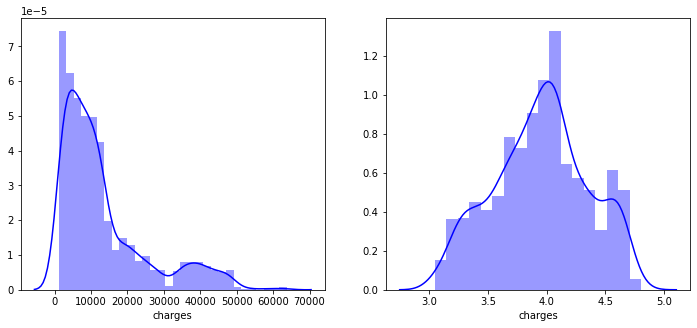

In [96]:
# Distribution of the charges
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df.charges, color = 'b')

# Natural Log for approximately normal distribution
plt.subplot(122)
sns.distplot(np.log10(df.charges), color = 'b')

The distribution of the charges is skewed to the right, so we applied natural log for ~ normal distribution.

### Visualizing distribution of numerical variables vs medical charges

Text(0.5, 1.0, 'Distribution of BMI')

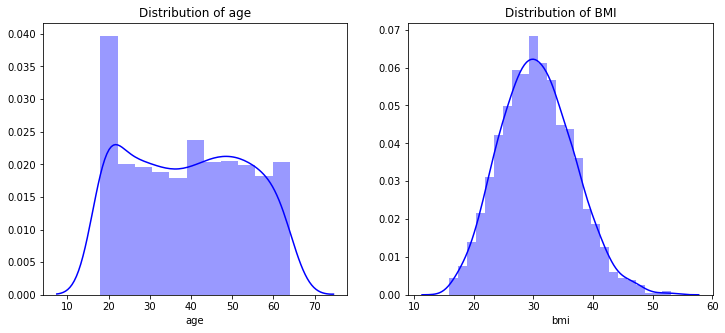

In [97]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(122)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')

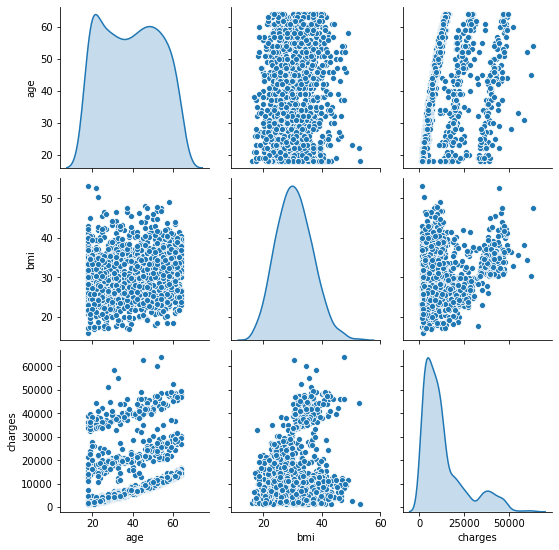

In [98]:
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

#### Insights: 
- The pairplot reveals that there is a linear relationship between age, bmi with charges

### Visualizing categorical variables individually vs medical charges

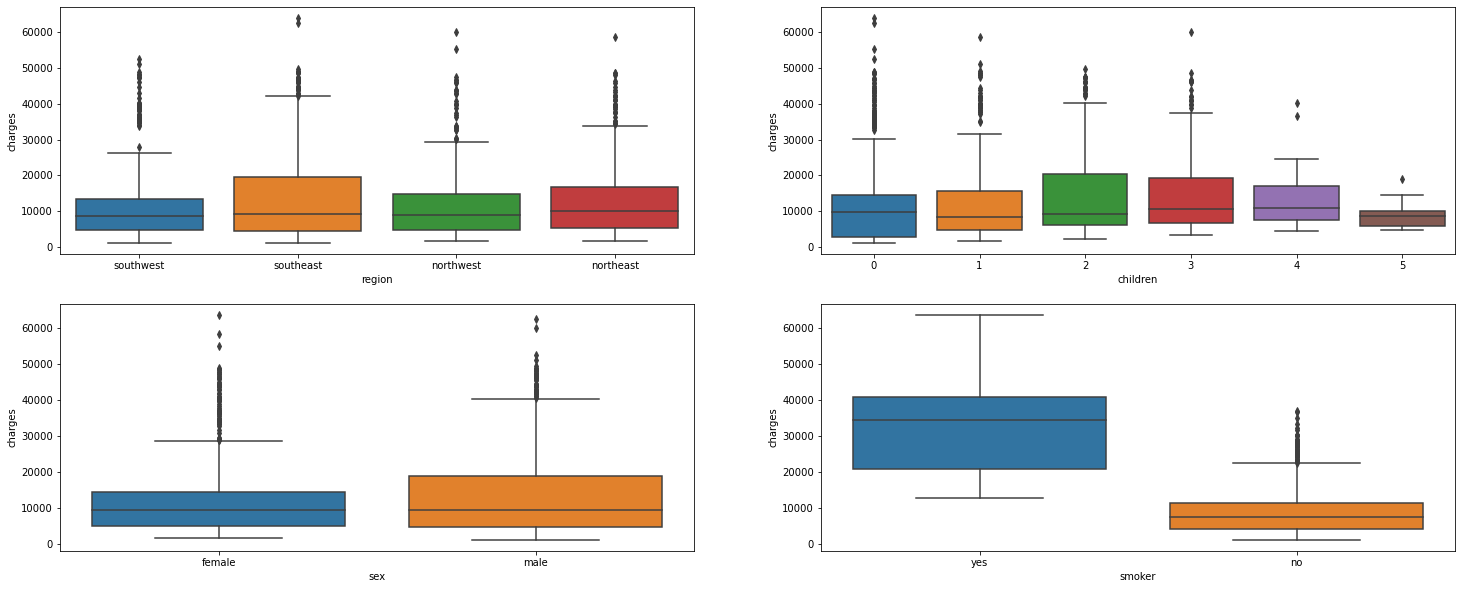

In [99]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

#### Insights: 
Based on the box plots above, we can derive some inferences on the categorical variables: 
- Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.
- Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.
- Gender: The data is a little bit biased towards males as the interquartile range for male is higher compare to that for female. The data representation for male to female is 50.5 to 49.5. 
- Smoking behavior: Approximately 21% of our data comprises of smokers. The median is high for smokers, in comparison to those that do not smoke.

Now that we have looked at the effect of individual variables on medical charges, let's look at effect of a combination of factors on medical charges.

## Distribution of charges based on a combination of factors 
### Charges by region

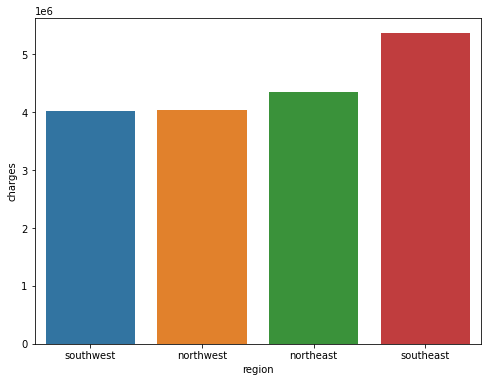

In [100]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize = (8,6))
ax = sns.barplot(x = charges.head().index, y = charges.head())

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.

### Charges by region and number of children

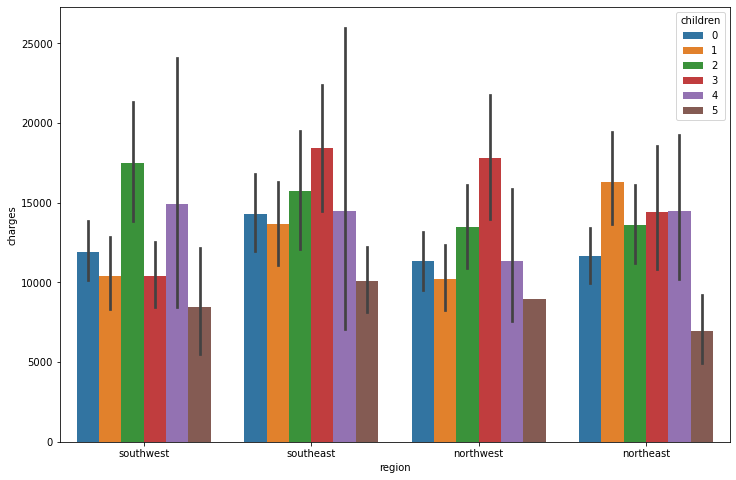

In [101]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

It seems that there is not a statistical difference in terms of how the number of children in a particular region affects charges.

### Charges by region and gender

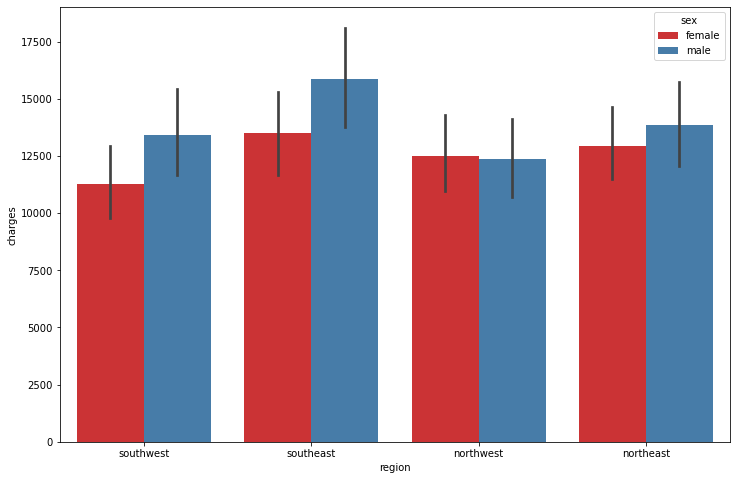

In [102]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges.

### Charges by region and smoking behavior

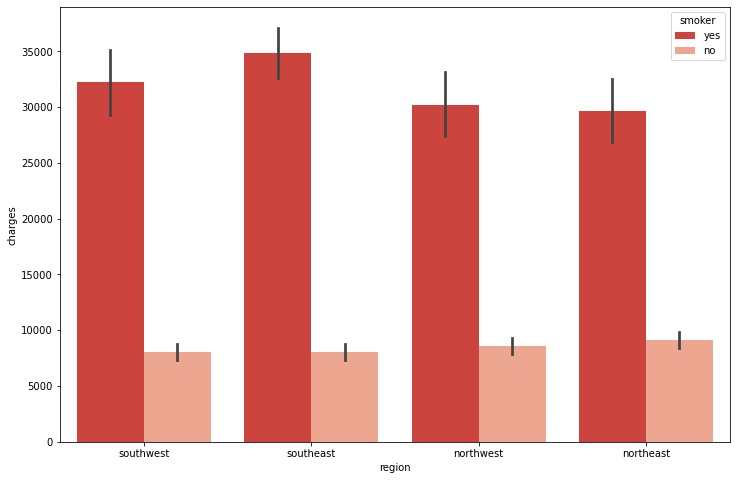

In [103]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')

In contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

From these bar charts, we can see that smoking behavior by region significantly affected medical charges. 
So, let's see the correlation between non-categorical variables (age, bmi, and children) with medical charges (evaluated based on smoking behavior).

### Charges by age, bmi, and children based on smoking behavior

Text(0.5, 1.0, 'Number of children vs Medical Charges')

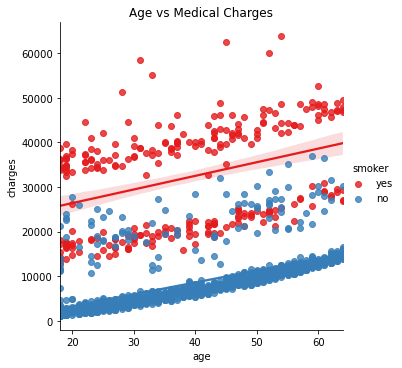

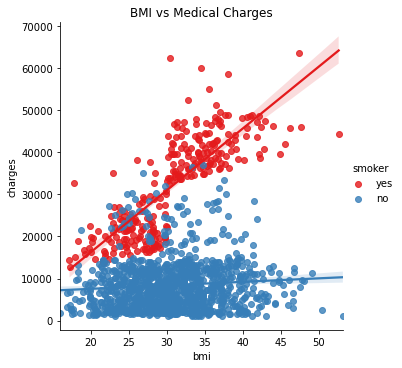

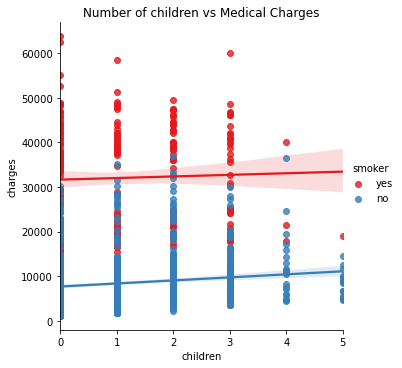

In [104]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Based on the analysis, we know that smoking has a great impact on medical costs. And, smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.

## Data Correlation 

To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap. 
- In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.

In [105]:
# Converting to categorical type
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [106]:
# Converting to numerical type
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

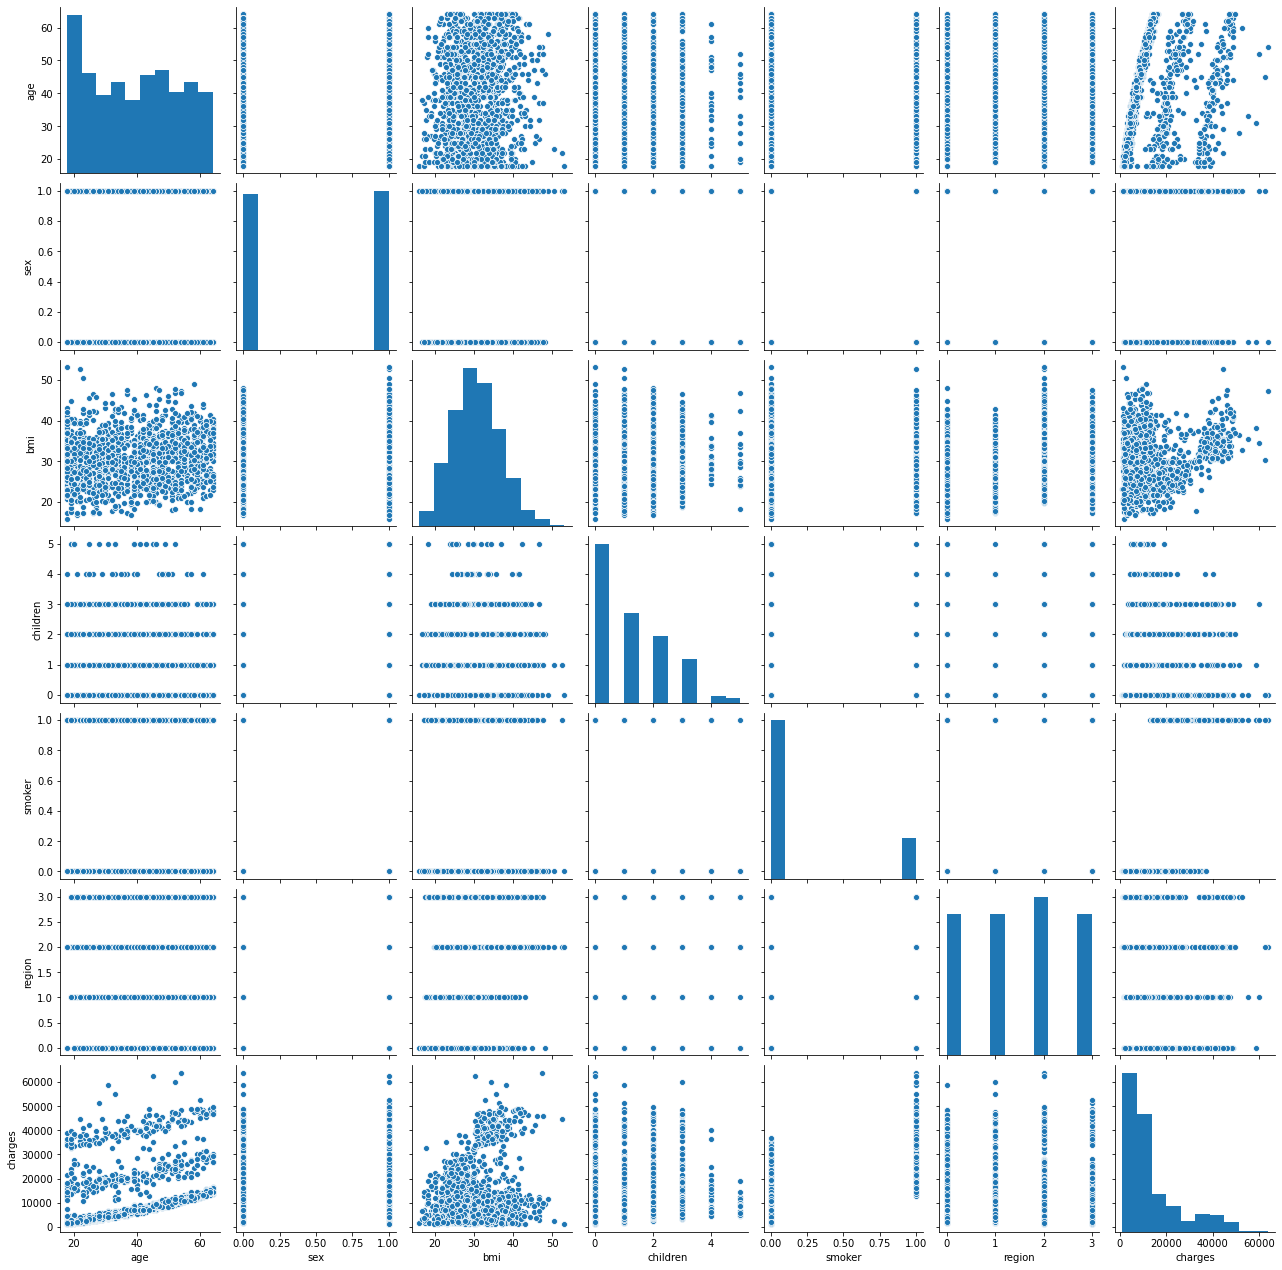

In [107]:
sns.pairplot(df)

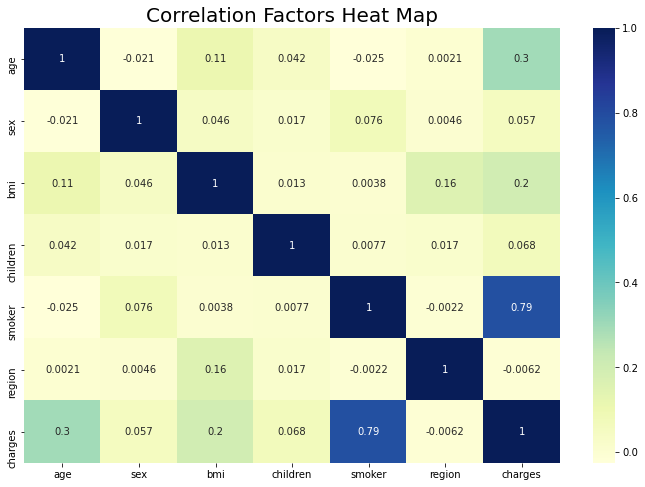

In [108]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

#### Insights: 
- The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).
- This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.

# Preparing Data for Machine Learning

Now that we understand our dataset, it is time to apply machine learning methods to predict future insurance cost of patients based on several factors.

First, we have to prepare our data by splitting it into training and testing data.

In [109]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [110]:
features = df.drop(['charges'], axis = 1)
targets = df['charges']

In [111]:
x_train, x_test, y_train, y_test = holdout(features, targets, test_size = 0.2, random_state = 0)

### Machine Learning
The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables.
We will use multiple techniques and select the method that produces the best score. The methods used will be: 
1. Linear Regression
2. Random Forest Regressor
3. Polynomial Regression

## Linear Regression

In [112]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -11661.98390882441
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [113]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(x_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
print('Model Score:', Lin_reg_model.score(x_test, y_test))

MSE train data: 3.77e+07, 
MSE test data: 3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 6.14e+03

R2 train data: 0.737, 
R2 test data: 0.8

Model Score: 0.7998747145449959


The model score we achieved generates a relatively good prediction; however, we can improve the model by potentially disregarding umimportant independent variables.

## Random Forest Regressor

In [114]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
print('Model Score:', RFR.score(x_test, y_test))

Mean Squared Error train data: 3774021.891
Mean Squared Error test data: 20609313.468

RMSE train data: 1.94e+03, 
RMSE test data: 1.94e+03

R2 train data: 0.971
R2 test data: 0.861

Model Score: 0.8704875363071409


The generated model score is an improvement from the previous model!

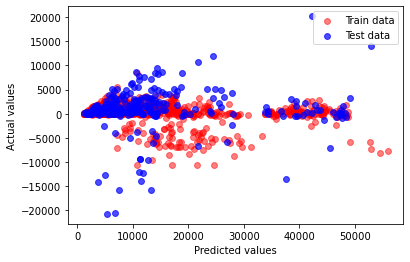

In [115]:
## Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))

# Train data
plt.scatter(x_train_predic, x_train_predic - y_train, c = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
# Test data
plt.scatter(x_test_predic, x_test_predic - y_test, c = 'blue', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')


plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')

Now that we have a graph of the actual vs predicted values, let's see the features that contribute heavily towards the prediction. We can do so by performing a feature importance ranking.
- The feature importance method for Random Forests is able draw conclusions about what features contribute most to the decision making in the model and help the user to better understand the drivers behind the model.

### Feature Importance Ranking

1.smoker(0.606920)
2.bmi(0.215519)
3.age(0.136149)
4.children(0.021318)
5.region(0.014086)
6.sex(0.006008)


<BarContainer object of 6 artists>

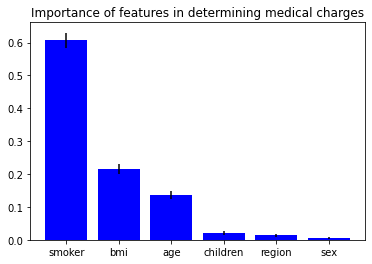

In [116]:
importances = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region']

imp_list = []
for value in range(features.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
# Plotting the feature importances
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

Based on the feature importances, we can see that the sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual. Therefore, we can eliminate those variables and generate another model to predict the insurance cost without accounting for those variables.
We are only choosing 2 lowest contributing variables to eliminate because it would not be accurate to remove too many potentially unimportant independent variables when generating a model. 

## Polynomial Regression

Prepare data again by eliminating unimportant variables and splitting the data into training and testing data.

In [117]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['charges','sex','region'], axis = 1)
target = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

In [118]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Score:', Pol_reg.score(x_test, y_test))

Intercept: -5325.881705252248
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Score: 0.8812595703345225


### Best Algorithm: 
Based on the perfomed machine learning algorithms, it seems that the Polynomial Regression after eliminating two unimportant independent variables produces the most accurate method and will be used to predict the insurance cost for an individual.
1. Polynomial Regression: 88%
2. Random Forest Regressor: 87%
3. Linear Regression: 80%

In [119]:
#Independent variables
features.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [120]:
#Dependent variable
targets.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [121]:
#Predicting the Medical Charges
y_test_predic = Pol_reg.predict(x_test)

#Actual vs predicted values
df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
df

,Actual values,Predicted values
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
